In [20]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt 

"""
Code to hold and test from scratch implementation of Single-Linkage algolithm of a 2D dataset

Authors
-------
Aydamir Mirzayev: https://github.com/AydamirMirzayev || https://www.linkedin.com/in/aydamir-mirzayev-97b297133/

Affiliation
-----------
Part of Bilkent University database

Methods
-------
standardize(data)
    Standizes the input data across every dimension: (x-mu)/std
    
def distance_matrix(X):
    Calculates distance between all point pairs

most_similar(M)
    Finds the closest two points in the dataset using linkage distance matrix
    
single_linkage( X, k)
    Perform single-linkage clustering untill only k clusters are left
    
plot_linkage(data, clusters, equal, title)
    Visualizes clusters reuslting from the linkage algorithm
    
"""    

'\nCode to hold and test from scratch implementation of Single-Linkage algolithm of a 2D dataset\n\nAuthors\n-------\nAydamir Mirzayev: https://github.com/AydamirMirzayev || https://www.linkedin.com/in/aydamir-mirzayev-97b297133/\n\nAffiliation\n-----------\nPart of Bilkent University database\n\nMethods\n-------\nstandardize(data)\n    Standizes the input data across every dimension: (x-mu)/std\n    \ndef distance_matrix(X):\n    Calculates distance between all point pairs\n\nmost_similar(M)\n    Finds the closest two points in the dataset using linkage distance matrix\n    \nsingle_linkage( X, k)\n    Perform single-linkage clustering untill only k clusters are left\n    \nplot_linkage(data, clusters, equal, title)\n    Visualizes clusters reuslting from the linkage algorithm\n    \n'

In [21]:
def standardize(data):
    
    """ Standizes the input data across every dimension: (x-mu)/std
        
    Parameters:
    data (2D int array): 2 dimentional input samples 
    
    Returns:
    new_data (2D int array): standardize version of the data 
    """
    
    L, dim = data.shape # L: number of instances and dim: number of data dimensions 
    new_data = np.zeros( data.shape) # placeholder for new_data 
    
    # standardize each dimension separately
    for i in range( dim):
        mean = np.mean(data[:,i])
        new_data[:,i] = (data[:,i] - mean)/ np.std( data[:,i])
    
    return new_data

In [22]:
def distance_matrix(X):
    
    """ Calculates distance between all point pairs reuslting in NxN matrix where N is the input size.
        Disntace metrix is Euclidian. Distance of a point to itself is defined to be infinitiy to avoid
        confusion in Linkage function. 
        N = dim
        
    Parameters:
    X (2D int array): 2 dimentional input samples 
    
    Returns:
    M (NxN float array): distance matrix 
    """
    
    dim = X.shape[0] #Take size and initialize
    M = np.zeros(( dim, dim)) 
    
    #calculate the distance pairs. 
    for i in range(dim):
        for j in range(dim):
            if i == j:
                M[i,j] = math.inf #distance of a point to itself is defined to be infite.
            else:
                M[i,j] = math.sqrt( ( X[i,0]- X[j,0])**2 + ( X[i,1]- X[j,1])**2)
    return M

In [23]:
def most_similar(M):

    """ Finds the closest two points in the dataset using linkage distance matrix. 
        
    Parameters:
    M (2D int array): 2 dimentional input samples 
    
    Returns:
    a          (int): index of the first of closest pair 
    b          (int): index of the second of closest pair
    """
    
    L = M.shape[0]
    ind = np.argmin(M) # Find the rank of the smallest number
    
    a = (int)(ind/L) #extract indices of datapoints yielding that rank (matrix is symmetric)
    b = ind%L
    
    return a, b

In [24]:
def single_linkage( X, k):
    
    """ Perform single-linkage clustering untill only k clusters are left 
        
    Parameters:
    X (2D int array): 2 dimentional input samples 
    k          (int): Number of desired clusters
    
    Methods:
    most_similar(M) 
        Finds the closest two points in the dataset using linkage distance matrix
        
    distance_matrix(X)
        Calculates distance between all point pairs
        
    Returns:
    clusters (2D int array): array indicating to which cluster each point belongs to
    
    """
    
    #params 
    length = X.shape[0]
    current_no = length
    
    #initialize
    clusters = np.arange(0,length).reshape(length,1) #start with N clusters.
    M = distance_matrix(X)

    while current_no > k:
        
        a, b = most_similar( M) #indices of two most similar points. 
        a = clusters[a] #indicate to which cluster they belong
        b = clusters[b]
        
        #merge two most similar clusters to one as the cluster with the
        #lowest index among the two
        if b < a:
            clusters[ clusters == a] = b
            indexes = np.argwhere(clusters==b)[:,0]

        else:
            clusters[ clusters == b] = a
            indexes = np.argwhere(clusters==a)[:,0]
        
        #set within cluster distances to infinity
        for i in indexes:
            for j in indexes:
                M[i,j] = math.inf

        current_no = current_no - 1 #decrement the number of clusters 
    
    return clusters

In [25]:
def plot_linkage(data, clusters, equal, title):
    
    """ Visualizes clusters reuslting from the linkage algorithm
        
    Parameters:
    data     (2D int array): 2 dimentional input samples 
    clusters (2D int array): array indicating to which cluster each point belongs to
    equal         (boolean): boolean indicating if the plot axes should be equal
    title          (string): title of the plot
    
    """
    
    # params
    colors = ['blue', 'red', 'green', 'purple', 'black' , 'gray','orange', 'yellow', 'royalblue', 'cyan']
    k = np.unique(clusters).shape[0] #number of clusters
    
    # plot each cluster with a different color
    plt.figure()
    for i, c in enumerate( np.unique(clusters)):
        cls = np.argwhere( clusters== c)[:,0] #indices with a cluster index
        plt.plot(data[cls,0],data[cls,1], '*', color= colors[i])
    if(equal):
        plt.axis('equal')  
    
    # below are optional style arrangements
    
    #tick sizes
    plt.xlabel(title, fontsize=20)
    plt.xticks(fontsize=21)
    plt.yticks(fontsize=21)
    
    
    #arrange tick spacing 
    xtics = np.zeros(5)
    xmax = max(data[:,0])
    xmin = min(data[:,0])
    step = (xmax - xmin)/4
    
    curr = xmin
    for i in range(5):
        xtics[i] = round(curr, 2)
        curr = curr + step
        
    #arrange tick spacing 
    ytics = np.zeros(5)
    ymax = max(data[:,1])
    ymin = min(data[:,1])
    step = (ymax - ymin)/4
    
    curr = ymin
    for i in range(5):
        ytics[i] = round(curr, 2)
        curr = curr + step    
    
    
    plt.xticks( xtics )
    plt.yticks( ytics )


# *Read data and test*

In [26]:
# Read and standardize the data
data1 = np.array( pd.read_csv("data1.txt", header = None, delim_whitespace=True, skipinitialspace=True), dtype=np.double)
data2 = np.array( pd.read_csv("data2.txt", header = None, delim_whitespace=True, skipinitialspace=True), dtype=np.double)

data1 = standardize(data1)
data2 = standardize(data2)

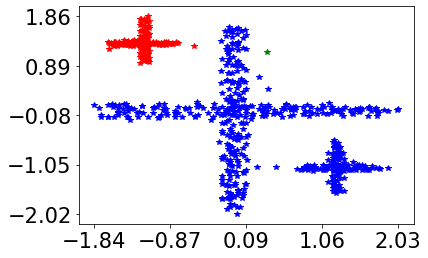

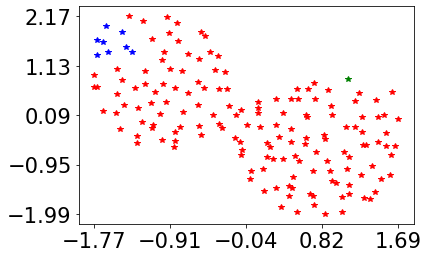

In [27]:
# Test results
clusters = single_linkage(data2,3)
plot_linkage(data2,clusters,False,"")

clusters = single_linkage(data1,3)
plot_linkage(data1,clusters,False,"")